In [1]:
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt

from place_cells import PlaceCells
from trajectory_generator import TrajectoryGenerator

import scipy
from scipy import interpolate

In [2]:
class Options:
    pass
options = Options()
options.save_dir = 'models'
options.n_epochs = 5          # number of training epochs
options.n_steps = 1000        # batches per epoch
options.batch_size = 1      # number of trajectories per batch
options.sequence_length = 50  # number of steps in trajectory
options.learning_rate = 1e-4  # gradient descent learning rate
options.Np = 512              # number of place cells
options.Ng = 4096             # number of grid cells
options.place_cell_rf = 0.12  # width of place cell center tuning curve (m)
options.surround_scale = 2    # if DoG, ratio of sigma2^2 to sigma1^2
options.RNN_type = 'RNN'      # RNN or LSTM
options.activation = 'relu'   # recurrent nonlinearity
options.weight_decay = 1e-4   # strength of weight decay on recurrent weights
options.DoG = True            # use difference of gaussians tuning curves
options.periodic = False      # trajectories with periodic boundary conditions
options.box_width = 2.2       # width of training environment
options.box_height = 2.2      # height of training environment

place_cells = PlaceCells(options)
us =place_cells.us
trajectory_generator = TrajectoryGenerator(options, place_cells)

inputs, pos, pc_outputs = trajectory_generator.get_test_batch()

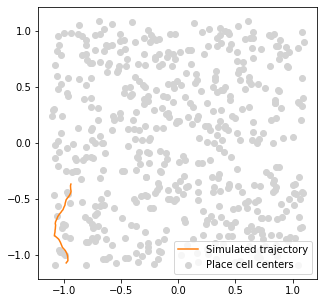

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(us[:,0], us[:,1], c='lightgrey', label='Place cell centers')

for i in range(1):
    plt.plot(pos[i,:,0],pos[i,:,1], label='Simulated trajectory', c='C1')
    if i==0:
        plt.legend();
plt.savefig('images/trajectory.png')

In [5]:
pc_outputs = tf.reshape(pc_outputs, (-1, options.Np))
pc = place_cells.grid_pc(pc_outputs, res=100)

In [9]:
pc.shape

(50, 100, 100)

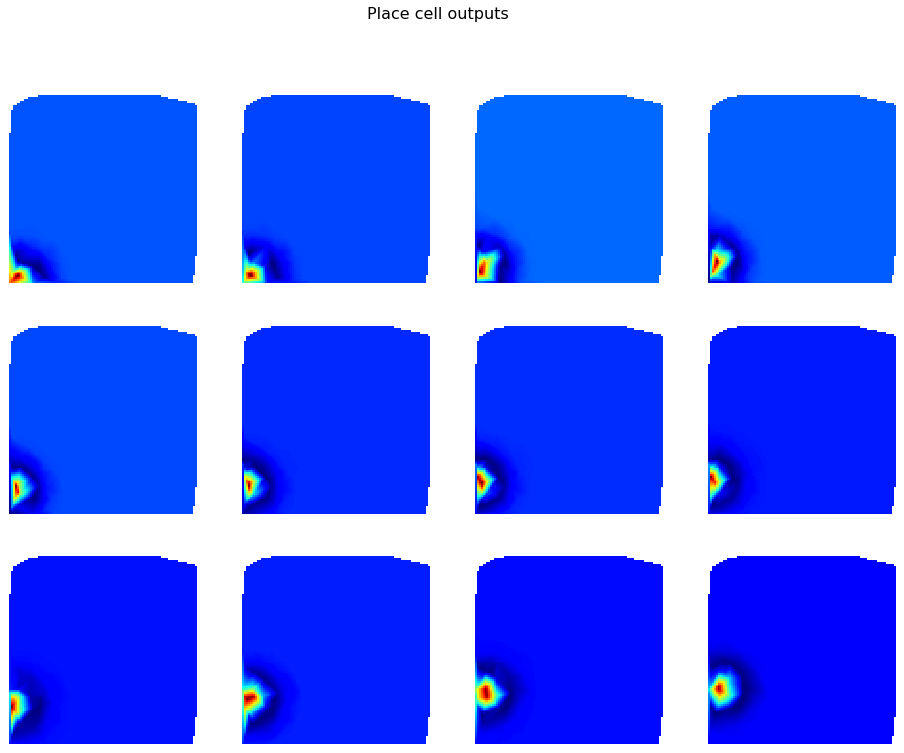

In [11]:
plt.figure(figsize=(16,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(pc[i*4], cmap='jet')
    plt.axis('off')
        
plt.suptitle('Place cell outputs', fontsize=16)
plt.savefig('images/pcoutputs.png')
plt.show()